# Computer Vision Project 1

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Histogram Equalization

In [51]:
#load image
img = cv2.imread('./detective.png', cv2.IMREAD_GRAYSCALE)

In [52]:
#Defice a function that returns the pdf of the image
def create_pdf(im_in):
    pdf = np.zeros(256)
    # calculate the histogram of the image
    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            pdf[im_in[i,j]] += 1
    # normalize
    # pdf = pdf/(im_in.shape[0]*im_in.shape[1])
    return pdf

In [53]:
# Define a function that returns the cdf of the pdf the image
def create_cdf(pdf):
    #cdf
    cdf = np.zeros(256)
    total = 0
    for i in range(256):
        total += pdf[i]
        cdf[i] = total
    return cdf

In [54]:
# Define the function that applies "Histogram equalization" on a given input image
def histogram_equalization(im_in):
    pdf = create_pdf(im_in)
    cdf = create_cdf(pdf)
    eq_im = np.zeros(im_in.shape)
    cdf_min = cdf.min()
    cdf_max = cdf.max()
    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            eq_im[i,j] = 255*(cdf[im_in[i,j]]-cdf_min)/(cdf_max-cdf_min)
    return eq_im

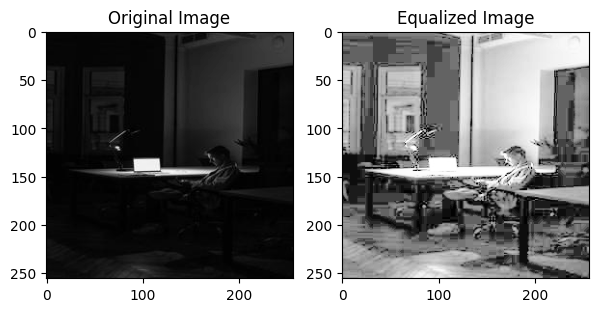

In [55]:
eq_img = histogram_equalization(img)
# Display the original image and the image after histogram equalization
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
# plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(eq_img, cmap='gray')
plt.title('Equalized Image')
# plt.axis('off')
plt.show()

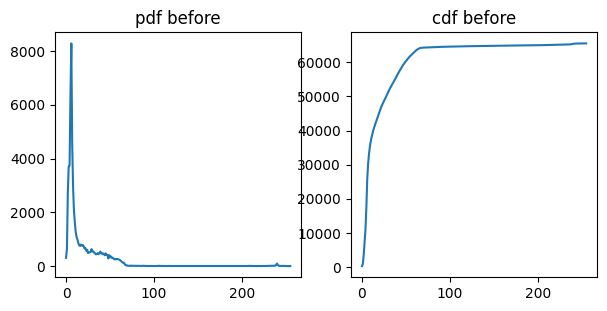

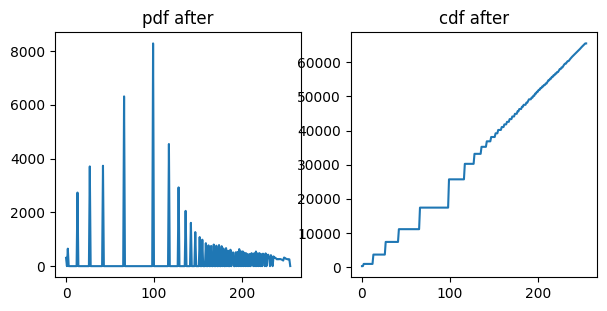

In [56]:
# Plot the pdf, cdf and image before and after histogram equalization
pdf_before = create_pdf(img)
cdf_before = create_cdf(pdf_before)
eq_img = eq_img.astype(np.uint8)
pdf_after = create_pdf(eq_img)
cdf_after = create_cdf(pdf_after)

# show the pdf, cdf and image before histogram equalization, in a line of 3 subplots
plt.figure(figsize=(7,7))
plt.subplot(221)
plt.plot(pdf_before)
plt.title('pdf before')

plt.subplot(222)
plt.plot(cdf_before)
plt.title('cdf before')
plt.show()

# show the pdf, cdf and image after histogram equalization, in a line of 3 subplots
plt.figure(figsize=(7,7))
plt.subplot(221)
plt.plot(pdf_after)
plt.title('pdf after')

plt.subplot(222)
plt.plot(cdf_after)
plt.title('cdf after')
plt.show()


- provide the comparison

## 2. mage Thresholding

In [125]:
# Load image
image_cell = cv2.imread('./TEM cell.png', cv2.IMREAD_GRAYSCALE)

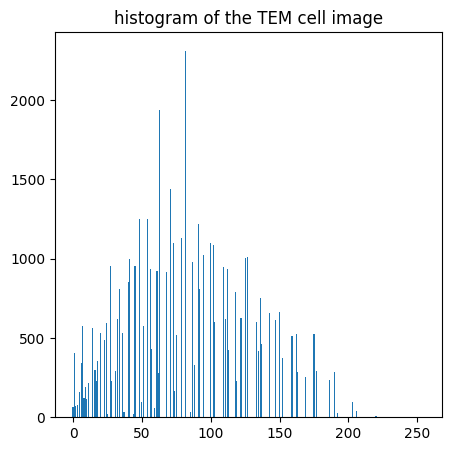

In [126]:
# Plot the histogram of the image using the functions you created for Q1
img2 = create_pdf(image_cell)
plt.figure(figsize=(5,5))
plt.bar(range(256), img2)
# plt.plot(img2)
plt.title('histogram of the TEM cell image')
plt.show()


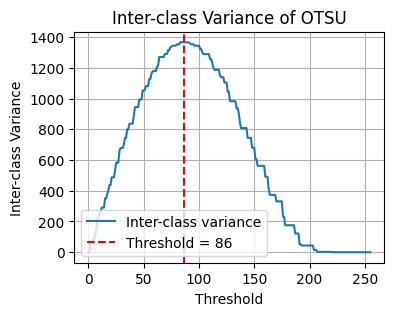

In [127]:
# Apply Otsu Thresholding and generate a plot of the inter-class variance
def otsu_thresholding(im_in):
    pdf = create_pdf(im_in)
    total_pixel = im_in.shape[0]*im_in.shape[1]
    g_max = 0
    threshold = 0
    inter_class_variance = np.zeros(256) # inter-class variance
    for i in range(256):
        n_0 = pdf[:i].sum() # foreground pixels
        n_1 = pdf[i:].sum() # background pixels
        mu_0 = 0 # mean of foreground pixels
        mu_1 = 1 # mean of background pixels
        for k in range(i):
            mu_0 += k*pdf[k]
        for k in range(i, 256):
            mu_1 += k*pdf[k]
        if n_0 == 0 or n_1 == 0:
            inter_class_variance[i] = 0
            continue

        mu_0 = mu_0/n_0
        mu_1 = mu_1/n_1
        omega_0 = n_0/total_pixel # probability of foreground pixels
        omega_1 = n_1/total_pixel # probability of background pixels
        g = omega_0*omega_1*(mu_0-mu_1)**2
        inter_class_variance[i] = g
        if g > g_max:
            g_max = g
            threshold = i
    return inter_class_variance, threshold
inter_class_variances, threshold = otsu_thresholding(image_cell)
# Plot inter-class variance as a function of threshold
plt.figure(figsize=(4,3))
plt.plot(inter_class_variances, label='Inter-class variance')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Inter-class Variance of OTSU')
plt.xlabel('Threshold')
plt.ylabel('Inter-class Variance')
plt.legend()
plt.grid(True)
plt.show()

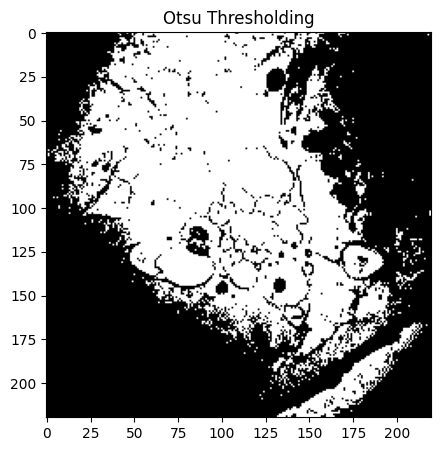

In [128]:
def otsu_thresholding_image(im_in, threshold):
    im_out = im_in.copy()
    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            if im_in[i,j] > threshold:
                im_out[i,j] = 255
            else:
                im_out[i,j] = 0
    plt.figure(figsize=(5,5))
    plt.imshow(im_out, cmap='gray')
    plt.title('Otsu Thresholding')
    plt.show()
otsu_thresholding_image(image_cell, threshold)

Display the Otsu thresholded image and discuss the results

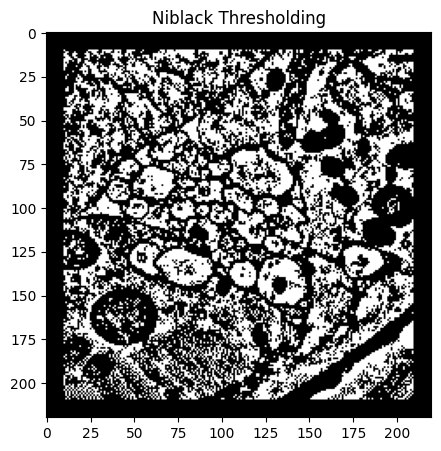

In [166]:
# Implement Niblack's Thresholding Algorithm
def niblack_thresholding(im_in, window_size, k):
    im_out = im_in.copy()
    for i in range(im_in.shape[0]):
        for j in range(im_in.shape[1]):
            if i < window_size//2 or j < window_size//2 or i >= im_in.shape[0]-window_size//2 or j >= im_in.shape[1]-window_size//2:
                im_out[i,j] = 0
                continue
            window = im_in[i-window_size//2:i+window_size//2+1, j-window_size//2:j+window_size//2+1]
            # mean = 0
            # size = len(window)
            # for m in range(size):
            #     for n in range(size):
            #         mean += window[m,n]
            # mean = mean/(size**2)
            mean = np.mean(window)
            # std = 0
            # for m in range(size):
            #     for n in range(size):
            #         std += (window[m,n] - mean)**2
            # std = np.sqrt(std/(size**2))
            std = np.std(window)
            threshold = mean + k*std
            if im_in[i,j] > threshold:
                im_out[i,j] = 255
            else:
                im_out[i,j] = 0
    return im_out
niblack_img = niblack_thresholding(image_cell, 20, 0.2)
plt.figure(figsize=(5,5))
plt.imshow(niblack_img, cmap='gray')
plt.title('Niblack Thresholding')
plt.show()       

Discuss the outputs of the two thresholded images based on the results you got